In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from larcv import larcv
%matplotlib inline

In [2]:
filename = '/Users/mdeltutt/Downloads/out_sbnd_3d_n5_r6_mb64_bpl2_nf32_lrstriangle_clr_classic_i1000.h5.pkl'
df_3d = pd.read_pickle(filename)

filename = '/Users/mdeltutt/Downloads/out_sbnd_2d_n5_r6_mb64_bpl2_nf32_lrstriangle_clr_classic_i600.h5.pkl'
df_2d = pd.read_pickle(filename)

In [3]:
df_3d.head()

,pot,nu_e,nu_vtx_x,nu_vtx_y,nu_vtx_z,n_voxels,true_neutrinoid,pred_neutrinoid,pred_nue,pred_numu,...,lep_thetayz,lep_dep_e,em_dep_e,tot_dep_e,lead_prot_p,lead_prot_costheta,lead_cpi_p,lead_cpi_costheta,lead_npi_p,lead_npi_costheta
0,1.830000e+14,-9999.0,831.0,363.0,1423.0,545.0,1.0,1.0,0.005957,0.988524,...,-32.117504,505.436119,17.3315,791.870105,405.770966,0.491926,-9999.000000,-9999.000000,-9999.0,-9999.0
1,1.830000e+14,-9999.0,535.0,176.0,963.0,1283.0,1.0,1.0,0.002177,0.982251,...,22.961565,1278.085149,0.0000,1952.514509,689.451343,0.760534,-9999.000000,-9999.000000,-9999.0,-9999.0
2,1.990000e+16,-9999.0,1223.0,222.0,1335.0,3290.0,0.0,0.0,0.998984,0.000665,...,32.978032,2907.087406,0.0000,3990.002371,937.749214,0.480438,-9999.000000,-9999.000000,-9999.0,-9999.0
3,1.990000e+16,-9999.0,1255.0,810.0,536.0,2439.0,0.0,0.0,0.999033,0.000674,...,-2.520245,2018.981809,0.0000,2767.462610,787.092147,0.689583,183.316409,-0.792968,-9999.0,-9999.0
4,1.830000e+14,-9999.0,362.0,108.0,1154.0,772.0,1.0,1.0,0.014256,0.974537,...,3.400474,1060.951449,0.0000,1370.499906,452.336364,-0.768907,-9999.000000,-9999.000000,-9999.0,-9999.0


In [4]:
df_2d.head()

,pot,nu_e,nu_vtx_x,nu_vtx_y,nu_vtx_z,n_voxels,true_neutrinoid,pred_neutrinoid,pred_nue,pred_numu,...,lep_thetayz,lep_dep_e,em_dep_e,tot_dep_e,lead_prot_p,lead_prot_costheta,lead_cpi_p,lead_cpi_costheta,lead_npi_p,lead_npi_costheta
0,1.830000e+14,-9999.0,-9999.0,-9999.0,-9999.0,8731.0,1.0,1.0,0.004591,0.988490,...,-27.479094,286.194857,290.160436,2952.847233,985.064166,0.830034,-9999.0,-9999.0,-9999.0,-9999.0
1,1.990000e+16,-9999.0,-9999.0,-9999.0,-9999.0,5956.0,0.0,0.0,0.999393,0.000499,...,20.920767,742.207281,46.333583,3051.898081,659.521662,0.347313,-9999.0,-9999.0,-9999.0,-9999.0
2,1.990000e+16,-9999.0,-9999.0,-9999.0,-9999.0,7519.0,0.0,0.0,0.987032,0.005944,...,-21.736748,553.806667,0.000000,1932.101359,421.015546,0.611066,-9999.0,-9999.0,-9999.0,-9999.0
3,1.830000e+14,-9999.0,-9999.0,-9999.0,-9999.0,874.0,1.0,0.0,0.333333,0.333333,...,-12.547109,139.284296,0.000000,554.951851,296.006360,0.517914,-9999.0,-9999.0,-9999.0,-9999.0
4,5.190000e+14,-9999.0,-9999.0,-9999.0,-9999.0,210.0,2.0,2.0,0.051884,0.055841,...,-9999.000000,-9999.000000,0.000000,297.579062,442.820449,0.678349,-9999.0,-9999.0,-9999.0,-9999.0


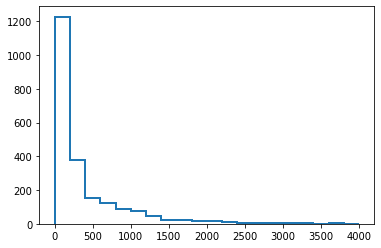

In [5]:
bins, edges, _ = plt.hist(df_3d.query('true_neutrinoid == 2')['n_voxels'].values, histtype='step', lw=2, 
                               bins=20, range=[0,4000])

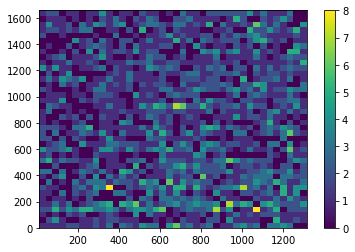

In [6]:
plt.hist2d(df_3d.query('true_neutrinoid == 0')['nu_vtx_x'].values, 
           df_3d.query('true_neutrinoid == 0')['nu_vtx_z'].values,
          bins=[40,40])

plt.colorbar()
plt.show()

In [7]:
import scipy.stats

def pot_scale_factor(this_pot, target = 1e20):
    
    return target / this_pot

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [25]:
name = 'neutrinoid'

signal = 1

nue_df_3d = df_3d.query('true_'+name+' == 0')
nue_sel_df_3d = df_3d.query('true_'+name+' == 0 and pred_'+name+' == ' + str(signal))

numu_df_3d = df_3d.query('true_'+name+' == 1')
numu_sel_df_3d = df_3d.query('true_'+name+' == 1 and pred_'+name+' == ' + str(signal))

nc_df_3d = df_3d.query('true_'+name+' == 2')
nc_sel_df_3d = df_3d.query('true_'+name+' == 2 and pred_'+name+' == ' + str(signal))

nue_df_2d = df_2d.query('true_'+name+' == 0')
nue_sel_df_2d = df_2d.query('true_'+name+' == 0 and pred_'+name+' == ' + str(signal))

numu_df_2d = df_2d.query('true_'+name+' == 1')
numu_sel_df_2d = df_2d.query('true_'+name+' == 1 and pred_'+name+' == ' + str(signal))

nc_df_2d = df_2d.query('true_'+name+' == 2')
nc_sel_df_2d = df_2d.query('true_'+name+' == 2 and pred_'+name+' == ' + str(signal))

In [26]:
# POT Scaling Factors
pot_scale_nue_3d  = pot_scale_factor(this_pot=np.sum(nue_df_3d['pot']))
pot_scale_numu_3d = pot_scale_factor(this_pot=np.sum(numu_df_3d['pot']))
pot_scale_nc_3d   = pot_scale_factor(this_pot=np.sum(nc_df_3d['pot']))
pot_scale_nue_2d  = pot_scale_factor(this_pot=np.sum(nue_df_2d['pot']))
pot_scale_numu_2d = pot_scale_factor(this_pot=np.sum(numu_df_2d['pot']))
pot_scale_nc_2d   = pot_scale_factor(this_pot=np.sum(nc_df_2d['pot']))

nue 3D - S/B =  0.0003048015
nue 2D - S/B =  0.0005887676
nue 3D - S/sqrt(B) =  0.21134965
nue 2D - S/sqrt(B) =  0.40441072
numu 3D - S/B =  37.445415
numu 2D - S/B =  18.793535
numu 3D - S/sqrt(B) =  4188.196
numu 2D - S/sqrt(B) =  2902.374


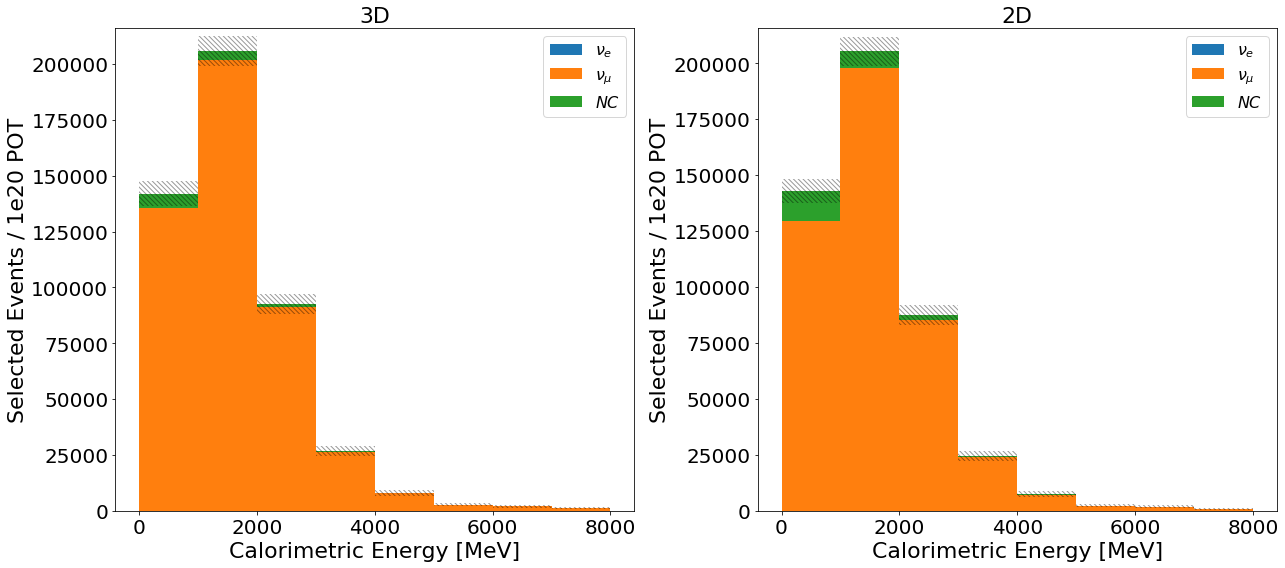

In [28]:
from tools import *

variable = 'lep_e'
xlabel='Lepton Energy [MeV]'
x_range = [0, 8000]

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(18, 8))

# plot_histogram(ax[0], [nue_sel_df_3d['lep_dep_e'].values, numu_sel_df_3d['em_dep_e'].values, nc_sel_df_3d['em_dep_e'].values],
#                weights=[[pot_scale_nue_3d]*len(nue_sel_df_3d), [pot_scale_numu_3d]*len(numu_sel_df_3d), [pot_scale_nc_3d]*len(nc_sel_df_3d)], 
#                n_bins=20, limits=x_range, option='stacked')

t_3d = plot_histogram(ax[0], [nue_sel_df_3d['tot_dep_e'].values, numu_sel_df_3d['tot_dep_e'].values, nc_sel_df_3d['tot_dep_e'].values],
                      weights=[[pot_scale_nue_3d]*len(nue_sel_df_3d), [pot_scale_numu_3d]*len(numu_sel_df_3d), [pot_scale_nc_3d]*len(nc_sel_df_3d)], 
                      n_bins=8, limits=x_range, option='stacked',
                      label=['$\\nu_e$', '$\\nu_\\mu$', '$NC$'])

# plot_histogram(ax[1], nue_sel_df_3d[variable].values,
#                weights=[pot_scale_nue_3d]*len(nue_sel_df_3d), 
#                n_bins=20, limits=x_range)

t_2d = plot_histogram(ax[1], [nue_sel_df_2d['tot_dep_e'].values, numu_sel_df_2d['tot_dep_e'].values, nc_sel_df_2d['tot_dep_e'].values],
                      weights=[[pot_scale_nue_2d]*len(nue_sel_df_2d), [pot_scale_numu_2d]*len(numu_sel_df_2d), [pot_scale_nc_2d]*len(nc_sel_df_2d)], 
                     n_bins=8, limits=x_range, option='stacked',
                     label=['$\\nu_e$', '$\\nu_\\mu$', '$NC$'])

ax[0].legend(fontsize=16, loc='best')
ax[1].legend(fontsize=16, loc='best')

ax[0].tick_params(labelsize=20)
ax[1].tick_params(labelsize=20)

ax[0].set_xlabel('Calorimetric Energy [MeV]', fontsize=22)
ax[1].set_xlabel('Calorimetric Energy [MeV]', fontsize=22)

ax[0].set_ylabel('Selected Events / 1e20 POT', fontsize=22)
ax[1].set_ylabel('Selected Events / 1e20 POT', fontsize=22)

ax[0].set_title('3D', loc='center', fontsize=22)
ax[1].set_title('2D', loc='center', fontsize=22)

fig.tight_layout()

s_b_3d = t_3d[0] / (t_3d[1] + t_3d[2])
s_b_2d = t_2d[0] / (t_2d[1] + t_2d[2])

print ('nue 3D - S/B = ', t_3d[0] / (t_3d[1] + t_3d[2]))
print ('nue 2D - S/B = ', t_2d[0] / (t_2d[1] + t_2d[2]))
print ('nue 3D - S/sqrt(B) = ', t_3d[0] / np.sqrt(t_3d[1] + t_3d[2]))
print ('nue 2D - S/sqrt(B) = ', t_2d[0] / np.sqrt(t_2d[1] + t_2d[2]))

print ('numu 3D - S/B = ', t_3d[1] / (t_3d[0] + t_3d[2]))
print ('numu 2D - S/B = ', t_2d[1] / (t_2d[0] + t_2d[2]))
print ('numu 3D - S/sqrt(B) = ', t_3d[1] / np.sqrt(t_3d[0] + t_3d[2]))
print ('numu 2D - S/sqrt(B) = ', t_2d[1] / np.sqrt(t_2d[0] + t_2d[2]))

plt.savefig('sig_bkg_stacked.pdf')
plt.show()


In [ ]:
name = 'neutrinoid'
# name = 'prot'
# name = 'cpi'
# name = 'npi'

# signal = 0 # nue, prot0, cpi = 0, npi = 0
signal = 1 # numu, prot1, cpi > 0, npi > 0
# signal = 2 # nc, prot2

if name == 'neutrinoid':
    if signal == 0: signal_txt = '$\\nu_{e}$'
    if signal == 1: signal_txt = '$\\nu_{\\mu}$'
    if signal == 2: signal_txt = '$NC$'

if name == 'prot':
    if signal == 0: signal_txt = '$N_{p} = 0$'
    if signal == 1: signal_txt = '$N_{p} = 1$'
    if signal == 2: signal_txt = '$N_{p} > 1$'
        
if name == 'cpi':
    if signal == 0: signal_txt = '$N_{\\pi^{\\pm}} = 0$'
    if signal == 1: signal_txt = '$N_{\\pi^{\\pm}} > 0$'

if name == 'npi':
    if signal == 0: signal_txt = '$N_{\\pi^{0}} = 0$'
    if signal == 1: signal_txt = '$N_{\\pi^{0}} > 0$'


nue_df_3d = df_3d.query('true_'+name+' == ' + str(signal))
nue_sel_df_3d = df_3d.query('true_'+name+' == ' + str(signal) + ' and pred_'+name+' == ' + str(signal))

nue_df_2d = df_2d.query('true_'+name+' == ' + str(signal))
nue_sel_df_2d = df_2d.query('true_'+name+' == ' + str(signal) + ' and pred_'+name+' == ' + str(signal))

In [ ]:
variable = 'lep_e'
xlabel='Lepton Energy [MeV]'
x_range = [0, 2500]

# variable = 'lep_costheta'
# xlabel='cos($\\theta_{lep}$)'
# x_range = [-1, 1]

# variable = 'lead_prot_p'
# xlabel='Leading Proton Momentum [MeV]'
# x_range = [0, 2000]

# variable = 'lead_prot_costheta'
# xlabel='Leading Proton cos($\\theta_p$)'
# x_range = [-1, 1]

# variable = 'lead_cpi_p'
# xlabel='Leading $\\pi^{\\pm}$ Momentum [MeV]'
# x_range = [0, 1500]

# variable = 'lead_cpi_costheta'
# xlabel='Leading Proton $\\pi^{\\pm}$ cos($\\theta_{\\pi^{\\pm}}$)'
# x_range = [-1, 1]

# variable = 'lead_npi_p'
# xlabel='Leading $\\pi^{0}$ Momentum [MeV]'
# x_range = [0, 1]

# variable = 'lead_npi_costheta'
# xlabel='Leading Proton $\\pi^{0}$ cos($\\theta_{\\pi^{0}}$)'
# x_range = [-1, 1]

print ('Overall efficiency - 3D:', float(len(nue_sel_df_3d)) / len(nue_df_3d))
print ('Overall efficiency - 2D:', float(len(nue_sel_df_2d)) / len(nue_df_2d))

pot_scale_3d = pot_scale_factor(this_pot=np.sum(nue_df_3d['pot']))
pot_scale_2d = pot_scale_factor(this_pot=np.sum(nue_df_2d['pot']))

nue_df_3d = nue_df_3d.query(variable + ' > -9999')
nue_sel_df_3d = nue_sel_df_3d.query(variable + ' > -9999')
nue_df_2d = nue_df_2d.query(variable + ' > -9999')
nue_sel_df_2d = nue_sel_df_2d.query(variable + ' > -9999')

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,14), sharex=True, sharey=False)


# 3D - left

bins, edges, _ = ax[0][0].hist([nue_df_3d[variable].values,nue_sel_df_3d[variable].values], histtype='step', lw=2, 
                               color = ['#ff7f0e', '#2ca02c'], 
                               label = ['Signal: '+signal_txt, 'Selected Signal'], 
                               weights=[[pot_scale_3d]*len(nue_df_3d), [pot_scale_3d]*len(nue_sel_df_3d)],
                               bins=20,
                               range=x_range)

eff_3d, unc_low_3d, unc_up_3d, bins_3d, bins_mid_3d, unc_x_3d = efficiency(num=nue_sel_df_3d[variable].values, 
                                                         den=nue_df_3d[variable].values, 
                                                         num_w=[pot_scale_3d]*len(nue_sel_df_3d), 
                                                         den_w=[pot_scale_3d]*len(nue_df_3d), 
                                                         n_bins=20, 
                                                         limits=x_range)

tot_eff_3d = float(len(nue_sel_df_3d)) / len(nue_df_3d)
tot_err_eff_3d = np.sqrt(float(len(nue_sel_df_3d))*(1-float(len(nue_sel_df_3d))/len(nue_df_3d)))/len(nue_df_3d)

ax[1][0].errorbar(bins_mid_3d, eff_3d, 
                  yerr=[unc_low_3d, unc_up_3d], xerr=unc_x_3d,
                  fmt='o',
                  color='#d62728',
                  label='Efficiency = ({0:0.2f} $\\pm$ {1:0.2f})%'.format(tot_eff_3d, tot_err_eff_3d))



# 2D - right

bins, edges, _ = ax[0][1].hist([nue_df_2d[variable],nue_sel_df_2d[variable]], histtype='step', lw=2, 
                               color = ['#ff7f0e', '#2ca02c'], 
                               label = ['Signal: '+signal_txt, 'Selected Signal'], 
                               weights=[[pot_scale_2d]*len(nue_df_2d), [pot_scale_2d]*len(nue_sel_df_2d)],
                               bins=20,
                               range=x_range)

eff_2d, unc_low_2d, unc_up_2d, bins_2d, bins_mid_2d, unc_x_2d = efficiency(num=nue_sel_df_2d[variable].values, 
                                                         den=nue_df_2d[variable].values, 
                                                         num_w=[pot_scale_2d]*len(nue_sel_df_2d), 
                                                         den_w=[pot_scale_2d]*len(nue_df_2d), 
                                                         n_bins=20, 
                                                         limits=x_range)

tot_eff_2d = float(len(nue_sel_df_2d)) / len(nue_df_2d)
tot_err_eff_2d = np.sqrt(float(len(nue_sel_df_2d))*(1-float(len(nue_sel_df_2d))/len(nue_df_2d)))/len(nue_df_2d)

ax[1][1].errorbar(bins_mid_2d, eff_2d, 
                  yerr=[unc_low_2d, unc_up_2d], xerr=unc_x_2d,
                  fmt='o',
                  color='#d62728',
                  label='Efficiency = ({0:0.2f} $\\pm$ {1:0.2f})%'.format(tot_eff_2d, tot_err_eff_2d))



fsize = 22

# Left settings

ax[0][0].set_ylabel('Events / $1.0 \\times 10^{20}$ POT', fontsize=fsize) # nue
# ax[0][0].set_ylabel('Events / $5.2 \\times 10^{19}$ POT', fontsize=fsize) # nue
# ax[0][0].set_ylabel('Events / $4.5 \\times 10^{17}$ POT', fontsize=fsize) # numu

ax[1][0].set_xlabel(xlabel, fontsize=fsize)
ax[1][0].set_ylabel('Signal selection efficiency', fontsize=fsize)

ax[0][0].tick_params(labelsize=20)
ax[1][0].tick_params(labelsize=20)

ax[0][0].legend(fontsize=18, loc='best')
ax[1][0].legend(fontsize=18, loc=3)
ax[1][0].set_ylim(0,1)
ax[1][0].set_xlim(x_range[0], x_range[1])


# Right settings

ax[0][1].set_ylabel('Events / $1.0 \\times 10^{20}$ POT', fontsize=fsize) # nue
# ax[0][1].set_ylabel('Events / $5.2 \\times 10^{19}$ POT', fontsize=fsize) # nue
# ax[0][1].set_ylabel('Events / $4.5 \\times 10^{17}$ POT', fontsize=fsize) # numu

ax[1][1].set_xlabel(xlabel, fontsize=fsize)
ax[1][1].set_ylabel('Signal selection efficiency', fontsize=fsize)

ax[0][1].tick_params(labelsize=20)
ax[1][1].tick_params(labelsize=20)

ax[0][1].legend(fontsize=18, loc='best')
ax[1][1].legend(fontsize=18, loc=3)
ax[1][1].set_ylim(0,1)
ax[1][1].set_xlim(x_range[0], x_range[1])


fig.tight_layout()

plt.savefig('selected_events_efficiency_'+name+'_sig'+str(signal)+'_'+variable+'.pdf')
plt.show()



# Number of protons

In [ ]:
name = 'neutrinoid'
# name = 'prot'
# name = 'cpi'
# name = 'npi'

# signal = 0 # nue, prot0, cpi = 0, npi = 0
signal = 1 # numu, prot1, cpi > 0, npi > 0
# signal = 2 # nc, prot2

if name == 'neutrinoid':
    if signal == 0: signal_txt = '$\\nu_{e}$'
    if signal == 1: signal_txt = '$\\nu_{\\mu}$'
    if signal == 2: signal_txt = '$NC$'

if name == 'prot':
    if signal == 0: signal_txt = '$N_{p} = 0$'
    if signal == 1: signal_txt = '$N_{p} = 1$'
    if signal == 2: signal_txt = '$N_{p} > 1$'
        
if name == 'cpi':
    if signal == 0: signal_txt = '$N_{\\pi^{\\pm}} = 0$'
    if signal == 1: signal_txt = '$N_{\\pi^{\\pm}} > 0$'

if name == 'npi':
    if signal == 0: signal_txt = '$N_{\\pi^{0}} = 0$'
    if signal == 1: signal_txt = '$N_{\\pi^{0}} > 0$'


nue_df_3d = df_3d.query('true_'+name+' == ' + str(signal))
nue_sel_df_3d = df_3d.query('true_'+name+' == ' + str(signal) + ' and pred_'+name+' == ' + str(signal))

nue_df_2d = df_2d.query('true_'+name+' == ' + str(signal))
nue_sel_df_2d = df_2d.query('true_'+name+' == ' + str(signal) + ' and pred_'+name+' == ' + str(signal))

In [ ]:
def make_plots(name, signal_txt, var, str_sig, str_sig_sel, df_3d, df_2d):
    
    sig_df_3d = df_3d.query(str_sig)
    sig_sel_df_3d = df_3d.query(str_sig_sel)

    sig_df_2d = df_2d.query(str_sig)
    sig_sel_df_2d = df_2d.query(str_sig_sel)

    print ('Overall efficiency - 3D:', float(len(sig_sel_df_3d)) / len(sig_df_3d))
    print ('Overall efficiency - 2D:', float(len(sig_sel_df_2d)) / len(sig_df_2d))

    pot_scale_3d = pot_scale_factor(this_pot=np.sum(sig_df_3d['pot']))
    pot_scale_2d = pot_scale_factor(this_pot=np.sum(sig_df_2d['pot']))
    
    sig_df_3d = sig_df_3d.query(var.variable + ' > -9999')
    sig_sel_df_3d = sig_sel_df_3d.query(var.variable + ' > -9999')
    sig_df_2d = sig_df_2d.query(var.variable + ' > -9999')
    sig_sel_df_2d = sig_sel_df_2d.query(var.variable + ' > -9999')


    fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,14), sharex=True, sharey=False)

    # 3D - left

    bins, edges, _ = ax[0][0].hist([sig_df_3d[var.variable].values,sig_sel_df_3d[var.variable].values], histtype='step', lw=2, 
                                   color = ['#ff7f0e', '#2ca02c'], 
                                   label = ['Signal: '+signal_txt, 'Selected Signal'], 
                                   weights=[[pot_scale_3d]*len(sig_df_3d), [pot_scale_3d]*len(sig_sel_df_3d)],
                                   bins=20,
                                   range=[var.x_1, var.x_2])

    eff_3d, unc_low_3d, unc_up_3d, bins_3d, bins_mid_3d, unc_x_3d = efficiency(num=sig_sel_df_3d[var.variable].values, 
                                                             den=sig_df_3d[var.variable].values, 
                                                             num_w=[pot_scale_3d]*len(sig_sel_df_3d), 
                                                             den_w=[pot_scale_3d]*len(sig_df_3d), 
                                                             n_bins=20, 
                                                             limits=[var.x_1, var.x_2])

    tot_eff_3d = float(len(sig_sel_df_3d)) / len(sig_df_3d)
    tot_err_eff_3d = np.sqrt(float(len(sig_sel_df_3d))*(1-float(len(sig_sel_df_3d))/len(sig_df_3d)))/len(sig_df_3d)

    ax[1][0].errorbar(bins_mid_3d, eff_3d, 
                      yerr=[unc_low_3d, unc_up_3d], xerr=unc_x_3d,
                      fmt='o',
                      color='#d62728',
                      label='Efficiency = ({0:0.2f} $\\pm$ {1:0.2f})%'.format(tot_eff_3d, tot_err_eff_3d))



    # 2D - right

    bins, edges, _ = ax[0][1].hist([sig_df_2d[var.variable],sig_sel_df_2d[var.variable]], histtype='step', lw=2, 
                                   color = ['#ff7f0e', '#2ca02c'], 
                                   label = ['Signal: '+signal_txt, 'Selected Signal'], 
                                   weights=[[pot_scale_2d]*len(sig_df_2d), [pot_scale_2d]*len(sig_sel_df_2d)],
                                   bins=20,
                                   range=[var.x_1, var.x_2])

    eff_2d, unc_low_2d, unc_up_2d, bins_2d, bins_mid_2d, unc_x_2d = efficiency(num=sig_sel_df_2d[var.variable].values, 
                                                             den=sig_df_2d[var.variable].values, 
                                                             num_w=[pot_scale_2d]*len(sig_sel_df_2d), 
                                                             den_w=[pot_scale_2d]*len(sig_df_2d), 
                                                             n_bins=20, 
                                                             limits=[var.x_1, var.x_2])

    tot_eff_2d = float(len(sig_sel_df_2d)) / len(sig_df_2d)
    tot_err_eff_2d = np.sqrt(float(len(sig_sel_df_2d))*(1-float(len(sig_sel_df_2d))/len(sig_df_2d)))/len(sig_df_2d)

    ax[1][1].errorbar(bins_mid_2d, eff_2d, 
                      yerr=[unc_low_2d, unc_up_2d], xerr=unc_x_2d,
                      fmt='o',
                      color='#d62728',
                      label='Efficiency = ({0:0.2f} $\\pm$ {1:0.2f})%'.format(tot_eff_2d, tot_err_eff_2d))



    fsize = 22

    # Left settings

    ax[0][0].set_ylabel('Events / $1.0 \\times 10^{20}$ POT', fontsize=fsize) # nue
    # ax[0][0].set_ylabel('Events / $5.2 \\times 10^{19}$ POT', fontsize=fsize) # nue
    # ax[0][0].set_ylabel('Events / $4.5 \\times 10^{17}$ POT', fontsize=fsize) # numu

    ax[1][0].set_xlabel(var.xlabel, fontsize=fsize)
    ax[1][0].set_ylabel('Signal selection efficiency', fontsize=fsize)

    ax[0][0].tick_params(labelsize=20)
    ax[1][0].tick_params(labelsize=20)

    ax[0][0].legend(fontsize=18)
    ax[1][0].legend(fontsize=18, loc=3)
    ax[1][0].set_ylim(0,1)


    # Right settings

    ax[0][1].set_ylabel('Events / $1.0 \\times 10^{20}$ POT', fontsize=fsize) # nue
    # ax[0][1].set_ylabel('Events / $5.2 \\times 10^{19}$ POT', fontsize=fsize) # nue
    # ax[0][1].set_ylabel('Events / $4.5 \\times 10^{17}$ POT', fontsize=fsize) # numu

    ax[1][1].set_xlabel(var.xlabel, fontsize=fsize)
    ax[1][1].set_ylabel('Signal selection efficiency', fontsize=fsize)

    ax[0][1].tick_params(labelsize=20)
    ax[1][1].tick_params(labelsize=20)

    ax[0][1].legend(fontsize=18)
    ax[1][1].legend(fontsize=18, loc=3)
    ax[1][1].set_ylim(0,1)


    fig.tight_layout()

    plt.savefig('selected_events_efficiency_'+name+'_'+var.variable+'.pdf')
    plt.show()
    
    
    
    
    fig = plt.figure(figsize=(9,8),facecolor='w')

    plt.errorbar(bins_mid_3d, eff_3d, 
                      yerr=[unc_low_3d, unc_up_3d], xerr=unc_x_3d,
                      fmt='o',
                      label='3D - Efficiency = ({0:0.2f} $\\pm$ {1:0.2f})%'.format(tot_eff_3d, tot_err_eff_3d))

    plt.errorbar(bins_mid_2d, eff_2d, 
                      yerr=[unc_low_2d, unc_up_2d], xerr=unc_x_2d,
                      fmt='o',
                      label='2D - Efficiency = ({0:0.2f} $\\pm$ {1:0.2f})%'.format(tot_eff_2d, tot_err_eff_2d))

    plt.xlabel(var.xlabel, fontsize=fsize)
    plt.ylabel('Signal selection efficiency', fontsize=fsize)

    plt.legend(fontsize=16, loc='best')
    # plt.title('SBND Sparse Data', loc='right', fontsize=14)
    plt.tick_params(labelsize=15)
    plt.ylim(0,1)

    plt.savefig('selected_events_efficiency_both_'+name+'_'+var.variable+'.pdf')
    plt.show()

In [ ]:
# https://stackoverflow.com/questions/35988/c-like-structures-in-python/31062667
from dataclasses import dataclass

@dataclass
class Variable:
    variable: str = 'lep_e'
    xlabel: str = 'Lepton Energy [MeV]'
    x_1: float = 0.0
    x_2: float = 2500.

all_vars = {
    'lep_p':               Variable(variable = 'lep_e', xlabel = 'Lepton Energy [MeV]', x_1 = 0.0, x_2 = 2500.),
    'lep_costheta':        Variable(variable = 'lep_costheta', xlabel = 'cos($\\theta_{lep}$)', x_1 = -1., x_2 = 1.),
    'lead_prot_p':         Variable(variable = 'lead_prot_p', xlabel = 'Leading Proton Momentum [MeV]', x_1 = 0., x_2 = 2000.),
    'lead_prot_costheta':  Variable(variable = 'lead_prot_costheta', xlabel = 'Leading Proton cos($\\theta_p$)', x_1 = 0., x_2 = 2000.),
}
# p = Variable(variable = 'lep_costheta', xlabel = 'cos($\\theta_{lep}$)', x_1 = -1., x_2 = 2500.)
# print (p.variable)

# sig = 0

# sig_df_3d = df_3d.query('true_neutrinoid == ' + str(signal))
# sig_sel_df_3d = df_3d.query('true_neutrinoid == ' + str(signal) + ' and pred_neutrinoid == ' + str(signal))

# sig_df_2d = df_2d.query('true_neutrinoid == ' + str(signal))
# sig_sel_df_2d = df_2d.query('true_neutrinoid == ' + str(signal) + ' and pred_neutrinoid == ' + str(signal))

# sel_str = 'true_neutrinoid == ' + str(signal)
# sel_str_sel = 'true_neutrinoid == ' + str(signal) + ' and pred_neutrinoid == ' + str(signal)





categories = [
    {
        'name'       : "nue_cc",
        'signal'     : "true_neutrinoid == 0",
        'signal_sel' : "true_neutrinoid == 0 and pred_neutrinoid == 0",
        'var'        : [all_vars['lep_p'], all_vars['lep_costheta']],
        'label'      : r"$\nu_e$ CC"
    },
    {
        'name'       : "numu_cc",
        'signal'     : "true_neutrinoid == 1",
        'signal_sel' : "true_neutrinoid == 1 and pred_neutrinoid == 1",
        'var'        : [all_vars['lep_p'], all_vars['lep_costheta']],
        'label'      : r"$\nu_{\mu}$ CC"
    },
    {
        'name'       : "nue_cc_0p",
        'signal'     : "true_neutrinoid == 0 and true_prot == 0",
        'signal_sel' : "true_neutrinoid == 0 and true_prot == 0 and pred_neutrinoid == 0 and pred_prot == 0",
        'var'        : [all_vars['lep_p'], all_vars['lep_costheta']],
        'label'      : r"$\nu_e CC$, $N_{p} = 0$"
    },
    {
        'name'       : "nue_cc_1p",
        'signal'     : "true_neutrinoid == 0 and true_prot == 1",
        'signal_sel' : "true_neutrinoid == 0 and true_prot == 1 and pred_neutrinoid == 0 and pred_prot == 1",
        'var'        : [all_vars['lep_p'], all_vars['lep_costheta'], all_vars['lead_prot_p'], all_vars['lead_prot_costheta']],
        'label'      : r"$\nu_e$ CC, $N_{p} = 1$"
    },
    {
        'name'       : "nue_cc_2p",
        'signal'     : "true_neutrinoid == 0 and true_prot == 2",
        'signal_sel' : "true_neutrinoid == 0 and true_prot == 2 and pred_neutrinoid == 0 and pred_prot == 2",
        'var'        : [all_vars['lep_p'], all_vars['lep_costheta'], all_vars['lead_prot_p'], all_vars['lead_prot_costheta']],
        'label'      : r"$\nu_e$ CC, $N_{p} > 1$"
    }
]


c = categories[0]
for v in c['var']:
    print (c['name'])
    print (c['signal'], c['signal_sel'])
    
    make_plots(c['name'], c['label'], v, c['signal'], c['signal_sel'], df_3d, df_2d)
#     break
    



In [ ]:

variable = 'lep_e'
xlabel='Lepton Energy [MeV]'
x_range = [0, 2500]

# variable = 'lep_costheta'
# xlabel='cos($\\theta_{lep}$)'
# x_range = [-1, 1]

# variable = 'lead_prot_p'
# xlabel='Leading Proton Momentum [MeV]'
# x_range = [0, 2000]

# variable = 'lead_prot_costheta'
# xlabel='Leading Proton cos($\\theta_p$)'
# x_range = [-1, 1]

# variable = 'lead_cpi_p'
# xlabel='Leading $\\pi^{\\pm}$ Momentum [MeV]'
# x_range = [0, 1500]

# variable = 'lead_cpi_costheta'
# xlabel='Leading Proton $\\pi^{\\pm}$ cos($\\theta_{\\pi^{\\pm}}$)'
# x_range = [-1, 1]

# variable = 'lead_npi_p'
# xlabel='Leading $\\pi^{0}$ Momentum [MeV]'
# x_range = [0, 1]

# variable = 'lead_npi_costheta'
# xlabel='Leading Proton $\\pi^{0}$ cos($\\theta_{\\pi^{0}}$)'
# x_range = [-1, 1]

print ('Overall efficiency - 3D:', float(len(nue_sel_df_3d)) / len(nue_df_3d))
print ('Overall efficiency - 2D:', float(len(nue_sel_df_2d)) / len(nue_df_2d))

pot_scale_3d = pot_scale_factor(this_pot=np.sum(nue_df_3d['pot']))
pot_scale_2d = pot_scale_factor(this_pot=np.sum(nue_df_2d['pot']))

nue_df_3d = nue_df_3d.query(variable + ' > -9999')
nue_sel_df_3d = nue_sel_df_3d.query(variable + ' > -9999')
nue_df_2d = nue_df_2d.query(variable + ' > -9999')
nue_sel_df_2d = nue_sel_df_2d.query(variable + ' > -9999')

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,14), sharex=True, sharey=False)


# 3D - left

bins, edges, _ = ax[0][0].hist([nue_df_3d[variable].values,nue_sel_df_3d[variable].values], histtype='step', lw=2, 
                               color = ['#ff7f0e', '#2ca02c'], 
                               label = ['Signal: '+signal_txt, 'Selected Signal'], 
                               weights=[[pot_scale_3d]*len(nue_df_3d), [pot_scale_3d]*len(nue_sel_df_3d)],
                               bins=20,
                               range=x_range)

eff_3d, unc_low_3d, unc_up_3d, bins_3d, bins_mid_3d, unc_x_3d = efficiency(num=nue_sel_df_3d[variable].values, 
                                                         den=nue_df_3d[variable].values, 
                                                         num_w=[pot_scale_3d]*len(nue_sel_df_3d), 
                                                         den_w=[pot_scale_3d]*len(nue_df_3d), 
                                                         n_bins=20, 
                                                         limits=x_range)

tot_eff_3d = float(len(nue_sel_df_3d)) / len(nue_df_3d)
tot_err_eff_3d = np.sqrt(float(len(nue_sel_df_3d))*(1-float(len(nue_sel_df_3d))/len(nue_df_3d)))/len(nue_df_3d)

ax[1][0].errorbar(bins_mid_3d, eff_3d, 
                  yerr=[unc_low_3d, unc_up_3d], xerr=unc_x_3d,
                  fmt='o',
                  color='#d62728',
                  label='Efficiency = ({0:0.2f} $\\pm$ {1:0.2f})%'.format(tot_eff_3d, tot_err_eff_3d))



# 2D - right

bins, edges, _ = ax[0][1].hist([nue_df_2d[variable],nue_sel_df_2d[variable]], histtype='step', lw=2, 
                               color = ['#ff7f0e', '#2ca02c'], 
                               label = ['Signal: '+signal_txt, 'Selected Signal'], 
                               weights=[[pot_scale_2d]*len(nue_df_2d), [pot_scale_2d]*len(nue_sel_df_2d)],
                               bins=20,
                               range=x_range)

eff_2d, unc_low_2d, unc_up_2d, bins_2d, bins_mid_2d, unc_x_2d = efficiency(num=nue_sel_df_2d[variable].values, 
                                                         den=nue_df_2d[variable].values, 
                                                         num_w=[pot_scale_2d]*len(nue_sel_df_2d), 
                                                         den_w=[pot_scale_2d]*len(nue_df_2d), 
                                                         n_bins=20, 
                                                         limits=x_range)

tot_eff_2d = float(len(nue_sel_df_2d)) / len(nue_df_2d)
tot_err_eff_2d = np.sqrt(float(len(nue_sel_df_2d))*(1-float(len(nue_sel_df_2d))/len(nue_df_2d)))/len(nue_df_2d)

ax[1][1].errorbar(bins_mid_2d, eff_2d, 
                  yerr=[unc_low_2d, unc_up_2d], xerr=unc_x_2d,
                  fmt='o',
                  color='#d62728',
                  label='Efficiency = ({0:0.2f} $\\pm$ {1:0.2f})%'.format(tot_eff_2d, tot_err_eff_2d))



fsize = 22

# Left settings

ax[0][0].set_ylabel('Events / $1.0 \\times 10^{20}$ POT', fontsize=fsize) # nue
# ax[0][0].set_ylabel('Events / $5.2 \\times 10^{19}$ POT', fontsize=fsize) # nue
# ax[0][0].set_ylabel('Events / $4.5 \\times 10^{17}$ POT', fontsize=fsize) # numu

ax[1][0].set_xlabel(xlabel, fontsize=fsize)
ax[1][0].set_ylabel('Signal selection efficiency', fontsize=fsize)

ax[0][0].tick_params(labelsize=20)
ax[1][0].tick_params(labelsize=20)

ax[0][0].legend(fontsize=18, loc='best')
ax[1][0].legend(fontsize=18, loc=3)
ax[1][0].set_ylim(0,1)
ax[1][0].set_xlim(x_range[0], x_range[1])


# Right settings

ax[0][1].set_ylabel('Events / $1.0 \\times 10^{20}$ POT', fontsize=fsize) # nue
# ax[0][1].set_ylabel('Events / $5.2 \\times 10^{19}$ POT', fontsize=fsize) # nue
# ax[0][1].set_ylabel('Events / $4.5 \\times 10^{17}$ POT', fontsize=fsize) # numu

ax[1][1].set_xlabel(xlabel, fontsize=fsize)
ax[1][1].set_ylabel('Signal selection efficiency', fontsize=fsize)

ax[0][1].tick_params(labelsize=20)
ax[1][1].tick_params(labelsize=20)

ax[0][1].legend(fontsize=18, loc='best')
ax[1][1].legend(fontsize=18, loc=3)
ax[1][1].set_ylim(0,1)
ax[1][1].set_xlim(x_range[0], x_range[1])


fig.tight_layout()

plt.savefig('selected_events_efficiency_'+name+'_sig'+str(signal)+'_'+variable+'.pdf')
plt.show()


